In [31]:
import numpy as np
np.set_printoptions(suppress=True)
from scipy import misc
from scipy.ndimage import convolve
from scipy import fftpack
import cv2
from collections import Counter
from skimage.exposure import match_histograms
import matplotlib.pyplot as plt
from skimage import io
import warnings
warnings.filterwarnings("ignore")
from scipy.ndimage import gaussian_filter
import math
from scipy.signal import convolve2d, gaussian, fftconvolve
from skimage.morphology import erosion, binary_erosion,binary_dilation, binary_opening, binary_closing, skeletonize

In [71]:
def Erode(im,SE):
    result=erosion(im,SE)
    return result 

In [12]:
def Dilate(im,SE):
    result=binary_dilation(im,SE)
    return result

In [18]:
def Opening(im,SE):
    result=binary_opening(im,SE)
    return result

In [19]:
def Closing(im,SE):
    result=binary_closing(im,SE)
    return result

In [38]:
def Skeletonize(im):
    result=skeletonize(im)
    return result

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


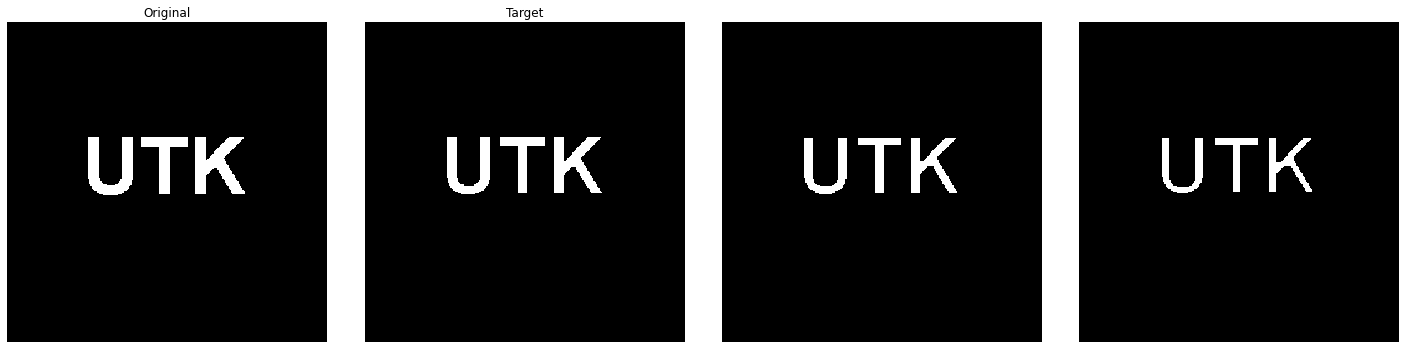

In [10]:
UTK=cv2.imread("UTK.tif",0)
SE=np.ones((3,3),dtype=float)
print(SE)
output1=Erode(UTK,SE)
output2=Erode(output1,SE)
output3=Erode(output2,SE)

fig,ax = plt.subplots(nrows = 1,ncols=4,figsize = (20,20))
plt.subplot(1,4,1),io.imshow(UTK),ax[0].set_title("Original")
plt.subplot(1,4,2),io.imshow(output1, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,3),io.imshow(output2, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,4),io.imshow(output3, cmap='gray'),ax[1].set_title("Target")
for a in ax:
    a.axis('off')

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]


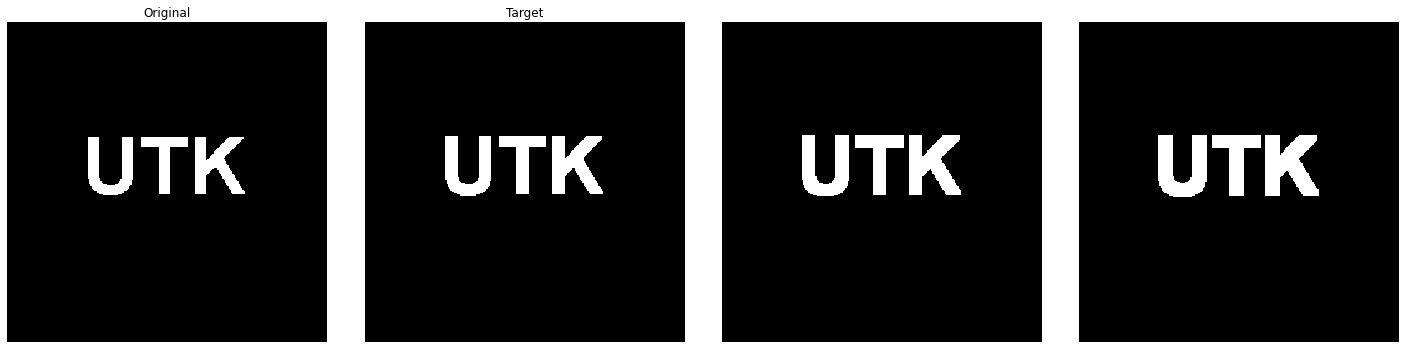

In [13]:
UTK=cv2.imread("UTK.tif",0)
SE=np.ones((3,3),dtype=float)
print(SE)
output1=Dilate(UTK,SE)
output2=Dilate(output1,SE)
output3=Dilate(output2,SE)

fig,ax = plt.subplots(nrows = 1,ncols=4,figsize = (20,20))
plt.subplot(1,4,1),io.imshow(UTK),ax[0].set_title("Original")
plt.subplot(1,4,2),io.imshow(output1, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,3),io.imshow(output2, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,4),io.imshow(output3, cmap='gray'),ax[1].set_title("Target")
for a in ax:
    a.axis('off')

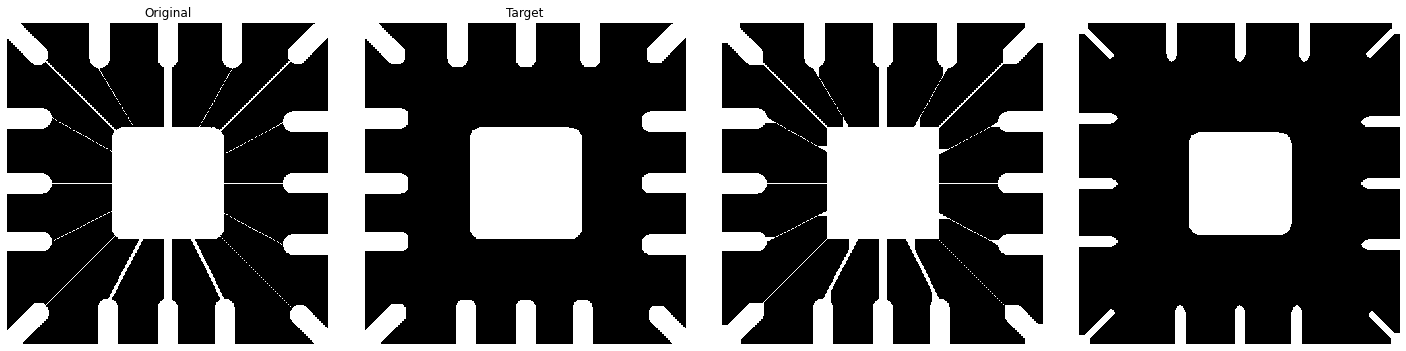

In [30]:
circuit=cv2.imread("circuitmask.tif",0)
SE=np.ones((30,30),dtype=float)
openoutput=Opening(circuit,SE)
closeoutput=Closing(circuit,SE)
erosionoutput=Erode(circuit,SE)

fig,ax = plt.subplots(nrows = 1,ncols=4,figsize = (20,20))
plt.subplot(1,4,1),io.imshow(circuit),ax[0].set_title("Original")
plt.subplot(1,4,2),io.imshow(openoutput, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,3),io.imshow(closeoutput, cmap='gray'),ax[1].set_title("Target")
plt.subplot(1,4,4),io.imshow(erosionoutput, cmap='gray'),ax[1].set_title("Target")
for a in ax:
    a.axis('off')

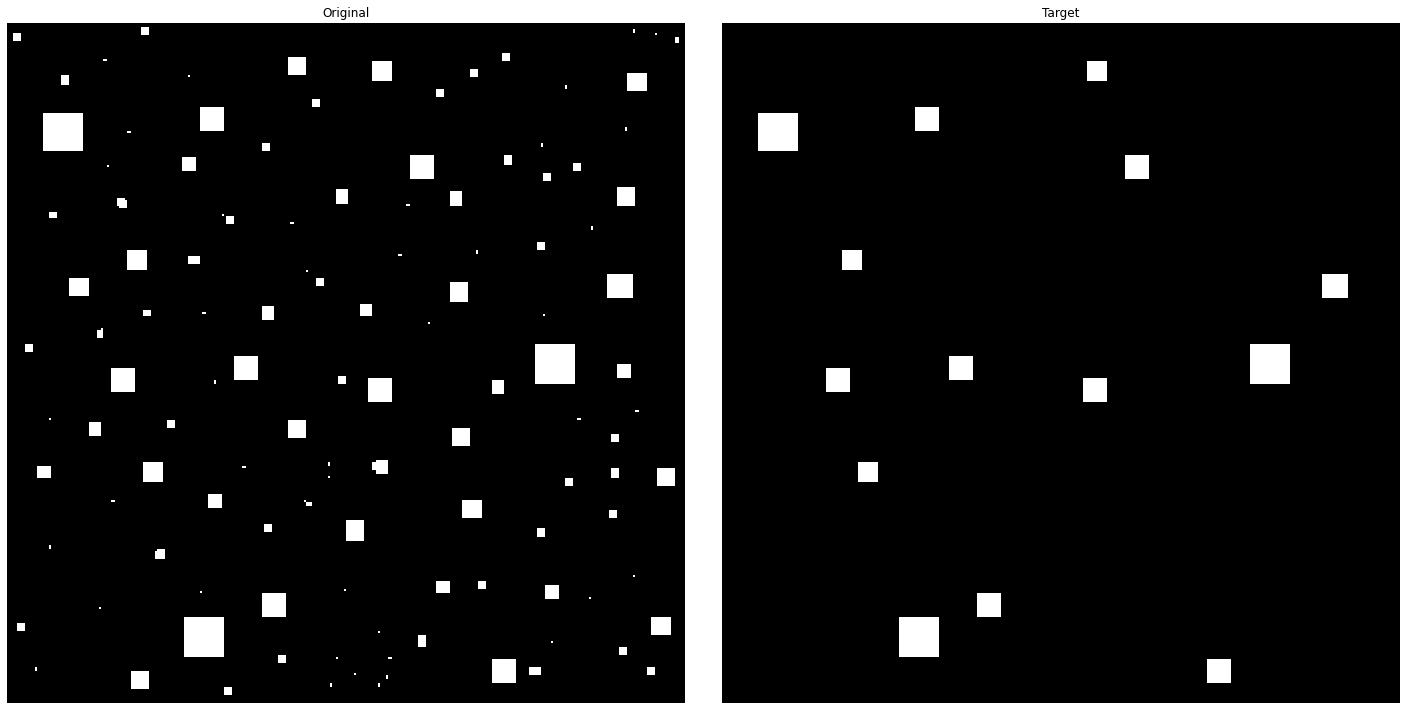

In [37]:
left=cv2.imread("left.tif",0)
result=Opening(left,SE=np.ones((10,10),dtype=float))


fig,ax = plt.subplots(nrows = 1,ncols=2,figsize = (20,20))
plt.subplot(1,2,1),io.imshow(left),ax[0].set_title("Original")
plt.subplot(1,2,2),io.imshow(result, cmap='gray'),ax[1].set_title("Target")
for a in ax:
    a.axis('off')


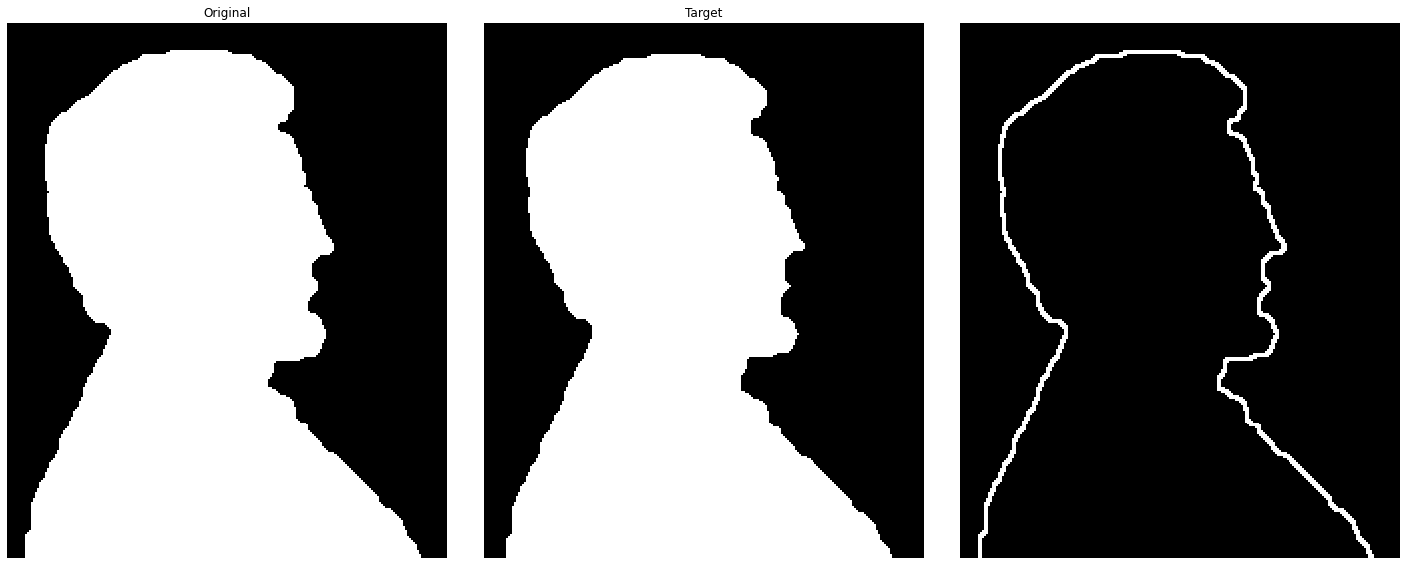

In [72]:
lincoln=cv2.imread("lincoln.tif",0)
SE=np.ones((5,5))
lincolnerode=Erode(lincoln,SE)
result=lincoln^lincolnerode


fig,ax = plt.subplots(nrows = 1,ncols=3,figsize = (20,20))
plt.subplot(1,3,1),io.imshow(lincoln),ax[0].set_title("Original")
plt.subplot(1,3,2),io.imshow(lincolnerode),ax[1].set_title("Target")
plt.subplot(1,3,3),io.imshow(result),ax[1].set_title("Target")
for a in ax:
    a.axis('off')

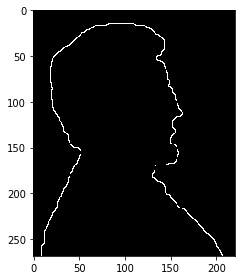

In [58]:
boundary = io.imread('lincoln.png')

kernel = np.ones((3,3))
boundary_erode = erosion(boundary, kernel)

diff = boundary^boundary_erode
io.imshow(diff)
plt.show()